# "Analyzing Patterns in Chicago Motor Vehicle Crashes Using Time-Series and Classification Techniques"
By: Christina Trotta
Faculty Mentor: Dr. Andrew Ross

Table of Contents:

***Add intro section

### Section 1 - Exploratory Data Analysis
### Section 2 - 

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

intro section...w hy are we interested, where di the data come from, data quality (recorded by city of chicago governemtn not citizens).. should be a complete records but this wont include minor ffenderbender or things that somoen wouldnt report

# Section 1 - Exploratory Data Analysis

In this section we will take a first glance at the data. Are there any obvious trends in the data? What should we expect from this data set? We need to pul summary statistics. Additionally, are there any obvious flaws with the data? It's important that we take into account any missing data, duplicate data, and handle it. 

In [2]:
# Load the raw data
df_raw = pd.read_csv("C:/Users/chris/Documents/Senior_Project/CT_SeniorProject/CrashData_Repo1/data/raw/raw_data.csv")

### General Data Trends and Descriptive Statistics


In [12]:
df_raw.info()     # Overview of column types and missing values
df_raw.describe()   # Summary statistics for numeric columns

KeyboardInterrupt: 

This is a preliminary test to see the general shape of the data. We can see the raw data has 910387 entries. There are 47 different fields in this data set. 

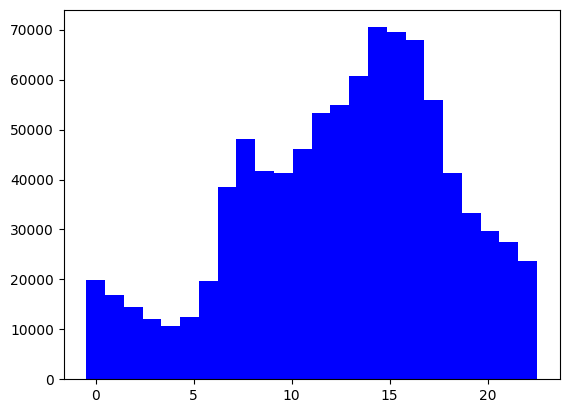

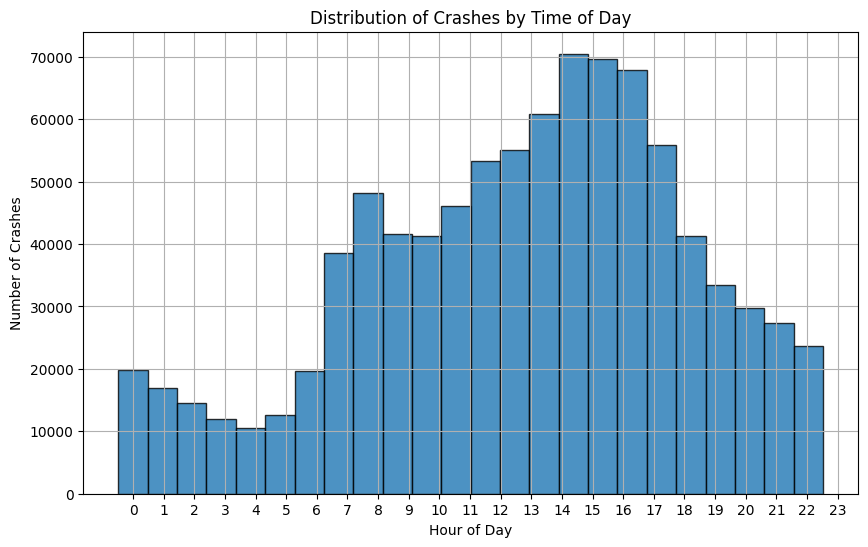

In [ ]:
# Plot the distribution of 'CRASH_HOUR'
df_raw['CRASH_HOUR'].hist(bins=24, grid=False, color='blue', align='left')

# Define a function to categorize the time of day
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'


plt.figure(figsize=(10, 6))
plt.hist(df_raw['CRASH_HOUR'], bins=24, edgecolor='black', alpha=0.8, align='left')
plt.title('Distribution of Crashes by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24))  # Set x-ticks to represent hours of the day (0-23)
plt.grid(True)
plt.show()


The histogram shows the frequency of crashes by hour of day. We see a large increase in the number of crashes around "rush hour", around the hours 2-6pm. Many people are commuting home from work during this time period. We also see an upward trend in crashes in the morning, around hours 7-10am. This increase compared to the early hours of the day again makes sense, due to the heavy increase in traffic for commuters on their way to work. The number of crashes during this timeframe 7-10am is similar to that during the 6-8pm timeframe. We can see a low number of crashes in the early hours of the day, from 12-5am. 

Questions from this initial histogram:
- How well does time/hour of day predict the probability/the number of car crashes?

1. How many crashes occurred in total, and how is this distributed by year or month? (Examine trends over time to identify whether crashes are increasing, decreasing, or remaining constant.) 

C:\Users\chris\AppData\Local\Temp\ipykernel_26736\2656098333.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_raw['CRASH_DATE'] = pd.to_datetime(df_raw['CRASH_DATE'])


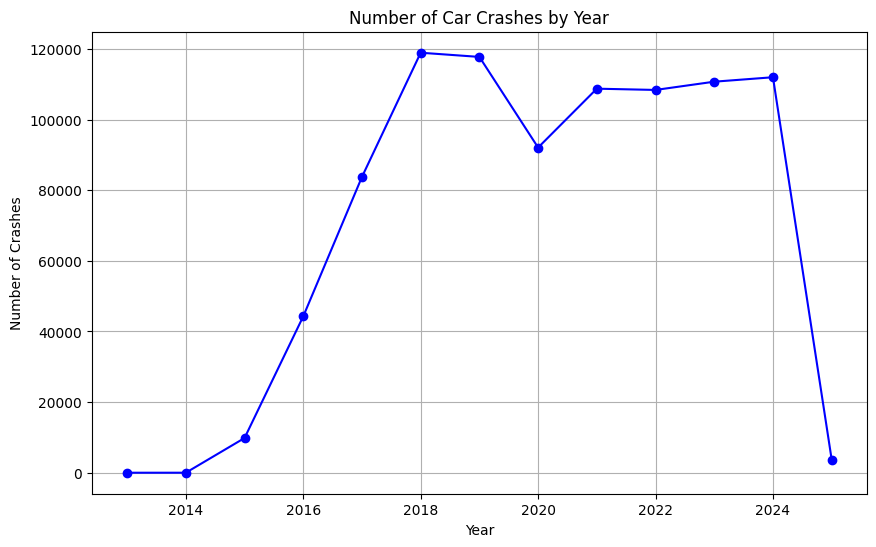

In [ ]:
# Examine car crashes over time by year with a line graph
df_raw['CRASH_DATE'] = pd.to_datetime(df_raw['CRASH_DATE'])
df_raw['CRASH_YEAR'] = df_raw['CRASH_DATE'].dt.year

# Group by year and count the number of crashes
crashes_by_year = df_raw.groupby('CRASH_YEAR').size()

# Plot the data
plt.figure(figsize=(10, 6))
crashes_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Number of Car Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

The above graph shows the number of car crashes by year. We can see a large increase in the number of crashes after 2015. This might not be extremely accurate however, since the graph is showing that the number of crashes in both 2013 and 2014 were both 0? Or a very small number. Let's dig a little further into these years to see what the data during this 2-year time span looks like.

In [13]:
# Return table of the number of crashes by year (only 2013 and 2014)
#crashes_by_year = df_filtered1314.groupby('CRASH_YEAR').size().reset_index(name='CRASH_COUNT')
crashes_by_year = df_raw.groupby('CRASH_YEAR').size().reset_index(name='CRASH_COUNT')
print(crashes_by_year)

    CRASH_YEAR  CRASH_COUNT
0         2013            2
1         2014            6
2         2015         9830
3         2016        44297
4         2017        83786
5         2018       118950
6         2019       117762
7         2020        92094
8         2021       108765
9         2022       108410
10        2023       110747
11        2024       112006
12        2025         3732


It seems like there is a discrepancy in the data reporting for years 2013 and 2014. This could be a reporting error, computer error, or perhaps the recording system was slowly being phased in throughout the city during this time. 

Since 2015, 2016, and 2017 are also a little bit low compared to years 2018-2024, we should remove these from further analysis as well. 

Additionally, since we don't have a full year's worth of data for 2025, we will also explude this data from our analysis. 

2. Which months or seasons have the highest/lowest crash counts? (Look at crash distributions across months and seasons.)

In [ ]:
# Create a line graph of number of crashes by month, comparing the different lines by year

# Filter out the years 2013, 2014, and 2015
 = df[~df['CRASH_YEAR'].isin([2013, 2014, 2015])]

# Group by year and month, counting the number of crashes
monthly_crashes = df_filtered.groupby(['CRASH_YEAR', 'CRASH_MONTH']).size().reset_index(name='crash_count')

# Pivot the data so each year is a column
monthly_crashes_pivot = monthly_crashes.pivot(index='CRASH_MONTH', columns='CRASH_YEAR', values='crash_count')

# Plot the data
plt.figure(figsize=(10,6))

# Plot each year as a separate line
for year in monthly_crashes_pivot.columns:
    plt.plot(monthly_crashes_pivot.index, monthly_crashes_pivot[year], label=str(year))

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.title('Number of Car Crashes by Month and Year (Excluding 2013, 2014, 2015)')
plt.xticks(monthly_crashes_pivot.index)  # Ensures all months are labeled
plt.legend(title="Year")
plt.grid(True)

# Show the plot
plt.show()

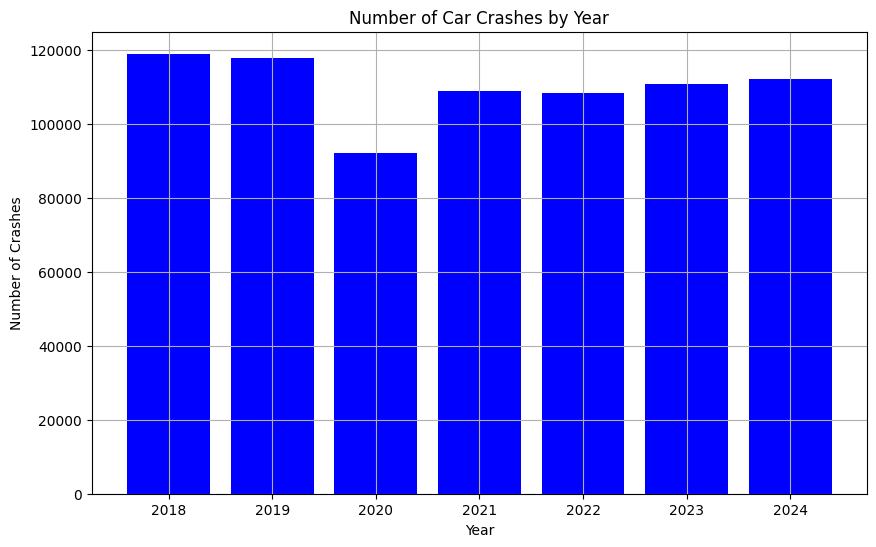

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.bar(crashes_by_year['CRASH_YEAR'], crashes_by_year['CRASH_COUNT'], color='blue')
# plt.title('Number of Car Crashes by Year')
# plt.xlabel('Year')
# plt.ylabel('Number of Crashes')
# plt.grid(True)
# plt.show()

In [ ]:
# #how many crashes per day? min, max, mean, median, std
# crashes_by_day = df.groupby('CRASH_DATE').size().reset_index(name='CRASH_COUNT')
# crashes_by_day.describe()


,CRASH_COUNT
count,2557.000000
mean,300.639030
std,56.310132
min,85.000000
25%,266.000000
50%,303.000000
75%,336.000000
max,583.000000


In [ ]:
# # Create the scatter plot
# plt.figure(figsize=(20, 6))
# plt.scatter(crashes_by_day['CRASH_DATE'], crashes_by_day['CRASH_COUNT'], alpha=0.6)
# plt.title('Number of Crashes per Day')
# plt.xlabel('Date')
# plt.ylabel('Number of Crashes')
# plt.grid(True)
# plt.show()

NameError: name 'plt' is not defined